In [27]:
import pandas as pd
import os
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data_path = Path.cwd().parent.joinpath("data")
print(data_path)

badges_path = data_path.joinpath("badges.csv")
companies_path = data_path.joinpath("companies.csv")
founders_path = data_path.joinpath("founders.csv")
industries_path = data_path.joinpath("industries.csv")
prior_companies_path = data_path.joinpath("prior_companies.csv")
regions_path = data_path.joinpath("regions.csv")
schools_path = data_path.joinpath("schools.csv")
tags_path = data_path.joinpath("tags.csv")

badges_df = pd.read_csv(badges_path)
companies_df = pd.read_csv(companies_path)
founders_df = pd.read_csv(founders_path)
industries_df = pd.read_csv(industries_path)
prior_companies_df = pd.read_csv(prior_companies_path)
regions_df = pd.read_csv(regions_path)
schools_df = pd.read_csv(schools_path)
tags_df = pd.read_csv(tags_path)

c:\dev\repos\tumai-onboarding-challenge\data


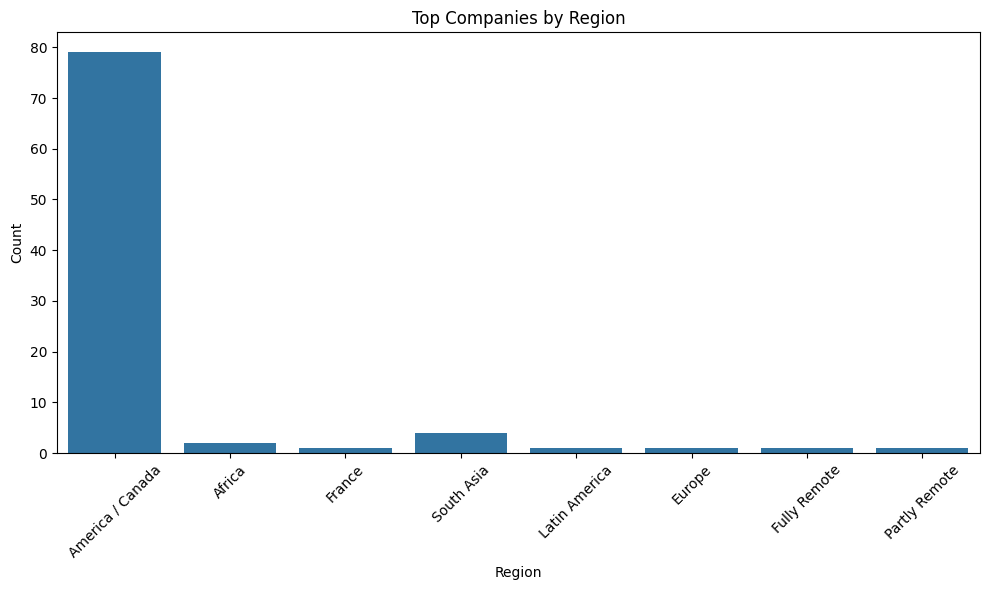

In [24]:
badges_regions_df = pd.merge(badges_df, regions_df, on='id')
top_companies_df = badges_regions_df[badges_regions_df['badge'] == 'topCompany']
plt.figure(figsize=(10, 6))
sns.countplot(data=top_companies_df, x='region')
plt.title('Top Companies by Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

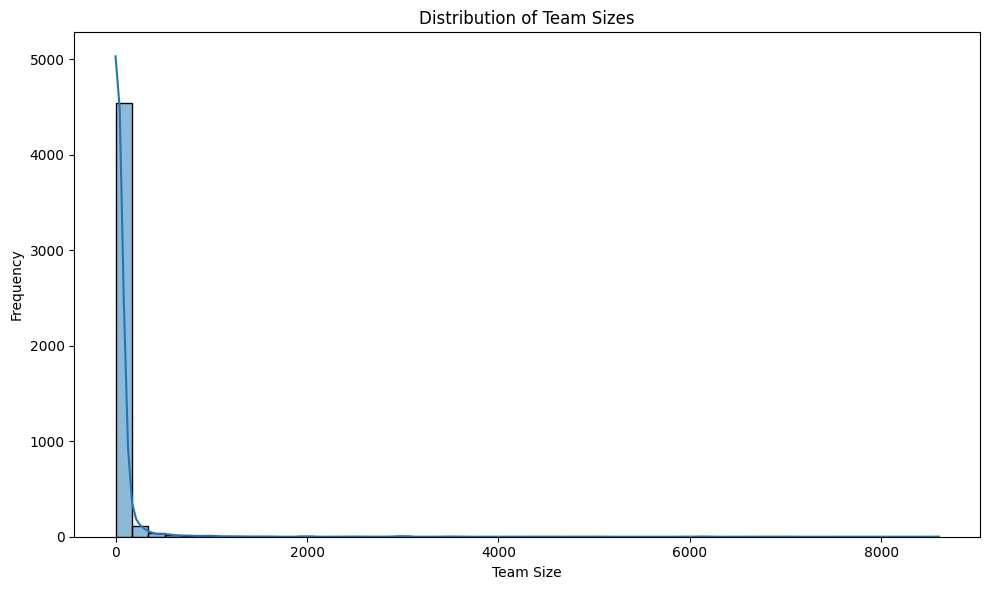

In [38]:
# Filter the companies_df for team sizes less than or equal to 500
filtered_companies_df = companies_df[companies_df['teamSize'] <= 10000]

# Create a histogram for the filtered data
plt.figure(figsize=(10, 6))
sns.histplot(filtered_companies_df['teamSize'], bins=50, kde=True)  # kde=True adds a Kernel Density Estimate curve
plt.title('Distribution of Team Sizes')
plt.xlabel('Team Size')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

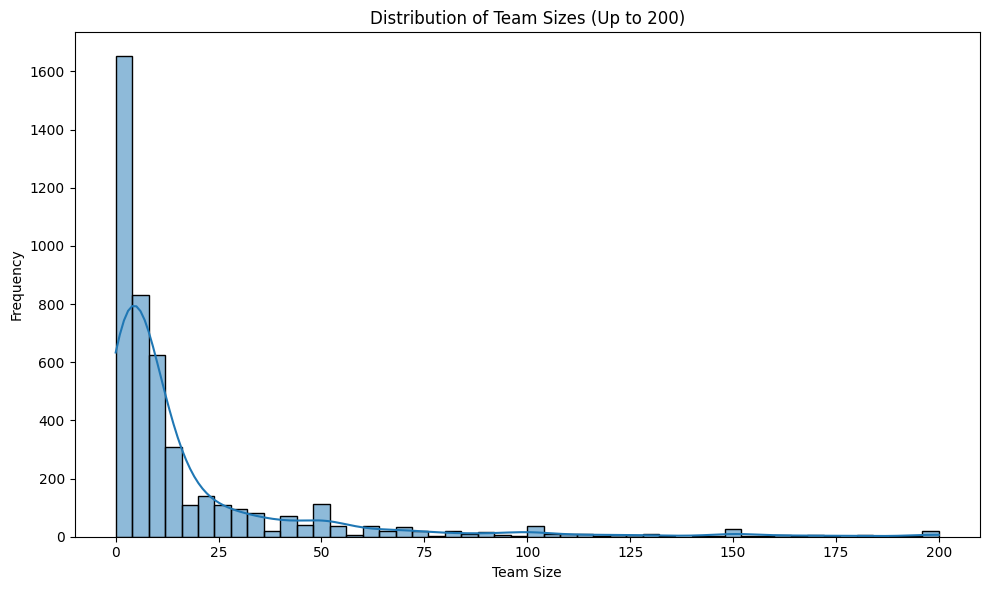

In [36]:
# Filter the companies_df for team sizes less than or equal to 500
filtered_companies_df = companies_df[companies_df['teamSize'] <= 200]

# Create a histogram for the filtered data
plt.figure(figsize=(10, 6))
sns.histplot(filtered_companies_df['teamSize'], bins=50, kde=True)  # kde=True adds a Kernel Density Estimate curve
plt.title('Distribution of Team Sizes (Up to 200)')
plt.xlabel('Team Size')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

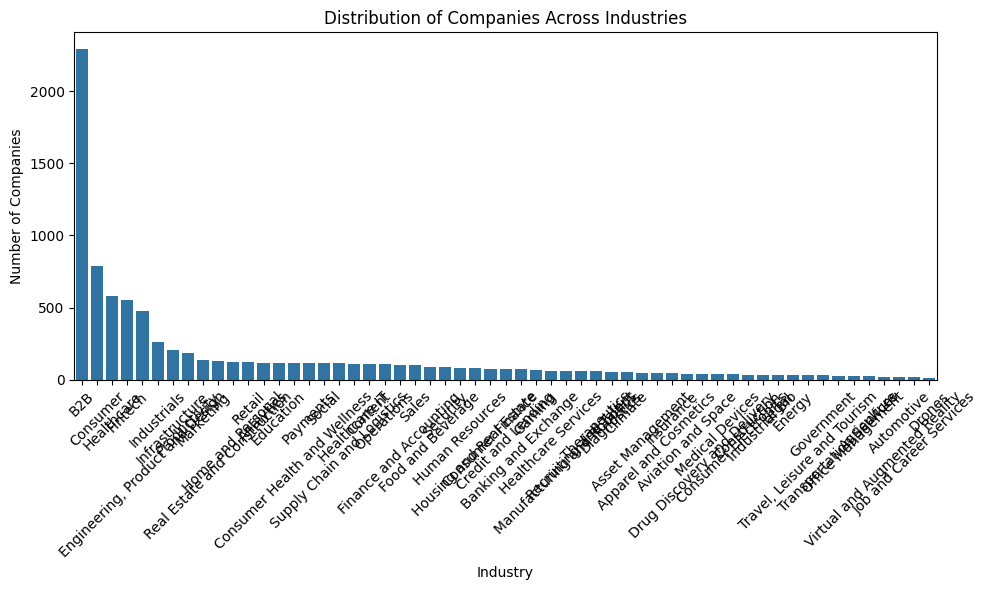

In [37]:
# Merge companies_df with industries_df to get the industry for each company
companies_industries_df = pd.merge(companies_df, industries_df, on='id')

# Create a bar plot for the distribution of companies across industries
plt.figure(figsize=(10, 6))
sns.countplot(data=companies_industries_df, x='industry', order=companies_industries_df['industry'].value_counts().index)
plt.title('Distribution of Companies Across Industries')
plt.xlabel('Industry')
plt.ylabel('Number of Companies')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


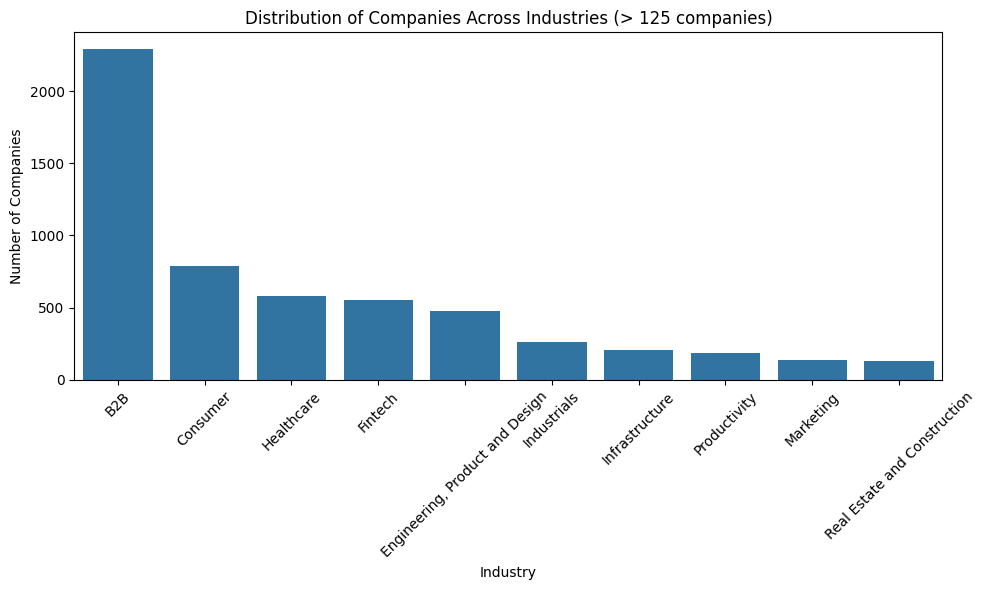

In [50]:
# Merge companies_df with industries_df to get the industry for each company
companies_industries_df = pd.merge(companies_df, industries_df, on='id')

# Count the number of companies in each industry
industry_counts = companies_industries_df['industry'].value_counts()

# Set a threshold, e.g., exclude industries with fewer than 125 companies
threshold = 125
filtered_industries = industry_counts[industry_counts >= threshold].index

# Filter the DataFrame to include only industries that meet the threshold
filtered_companies_industries_df = companies_industries_df[companies_industries_df['industry'].isin(filtered_industries)]

# Create a bar plot for the filtered industries
plt.figure(figsize=(10, 6))
sns.countplot(data=filtered_companies_industries_df, x='industry', order=filtered_companies_industries_df['industry'].value_counts().index)
plt.title('Distribution of Companies Across Industries (> 125 companies)')
plt.xlabel('Industry')
plt.ylabel('Number of Companies')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


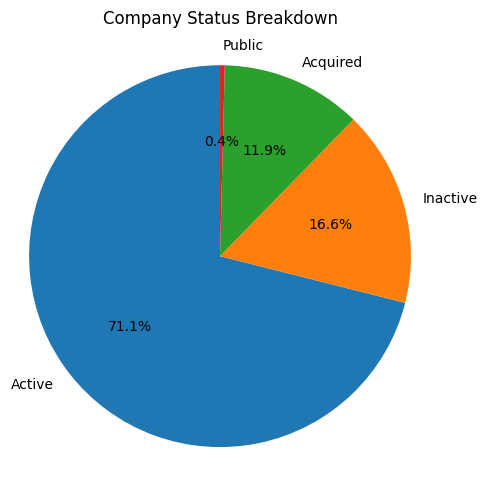

In [54]:
# Count the number of companies by status
status_counts = companies_df['status'].value_counts()

# Create a pie chart
plt.figure(figsize=(5, 5))
plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Company Status Breakdown')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.tight_layout()
plt.show()

C:\Users\Matthias Sagerer\AppData\Local\Temp\ipykernel_12840\4134195465.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=average_team_size_by_industry, x='industry', y='teamSize', palette='viridis')


<Figure size 1000x600 with 0 Axes>

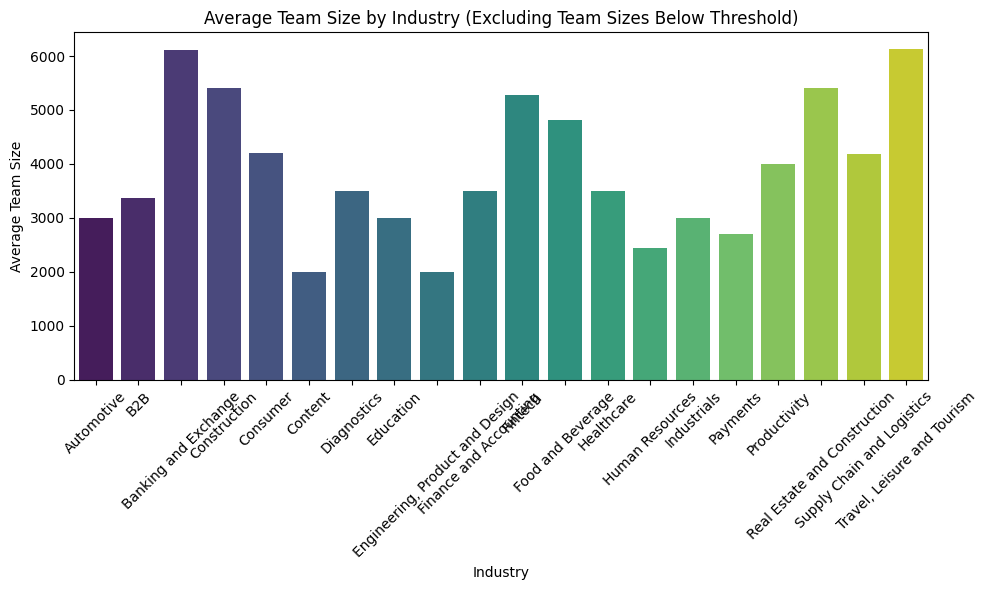

C:\Users\Matthias Sagerer\AppData\Local\Temp\ipykernel_12840\4134195465.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=average_team_size_by_industry, x='industry', y='teamSize', palette='viridis')
C:\Users\Matthias Sagerer\AppData\Local\Temp\ipykernel_12840\4134195465.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=top_10_companies, x='industry', palette='viridis')
C:\Users\Matthias Sagerer\AppData\Local\Temp\ipykernel_12840\4134195465.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=top_10_companies, x='ind

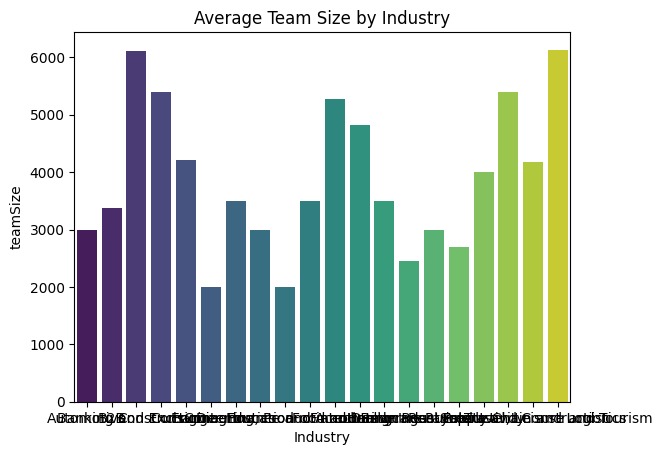

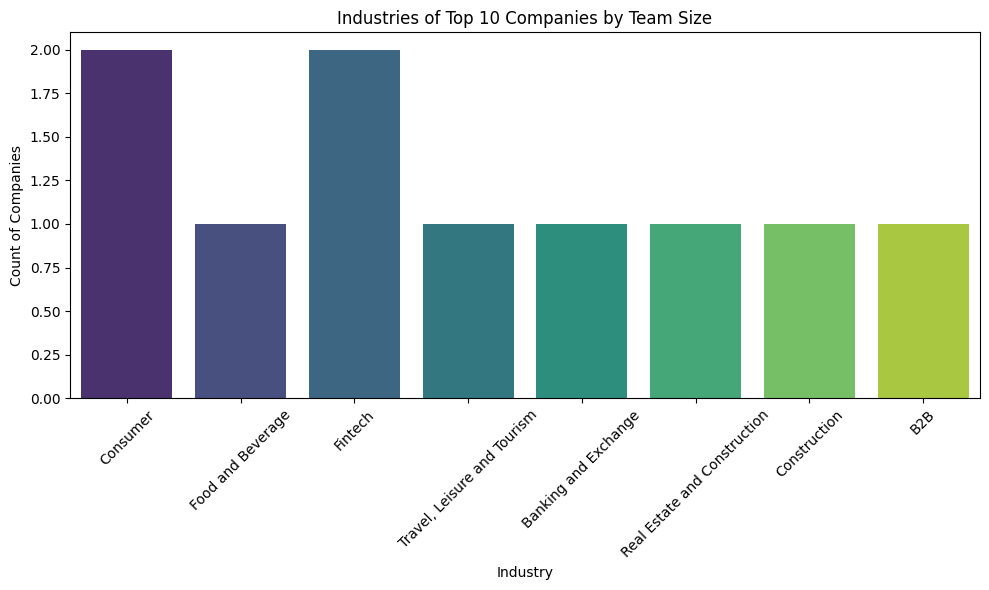

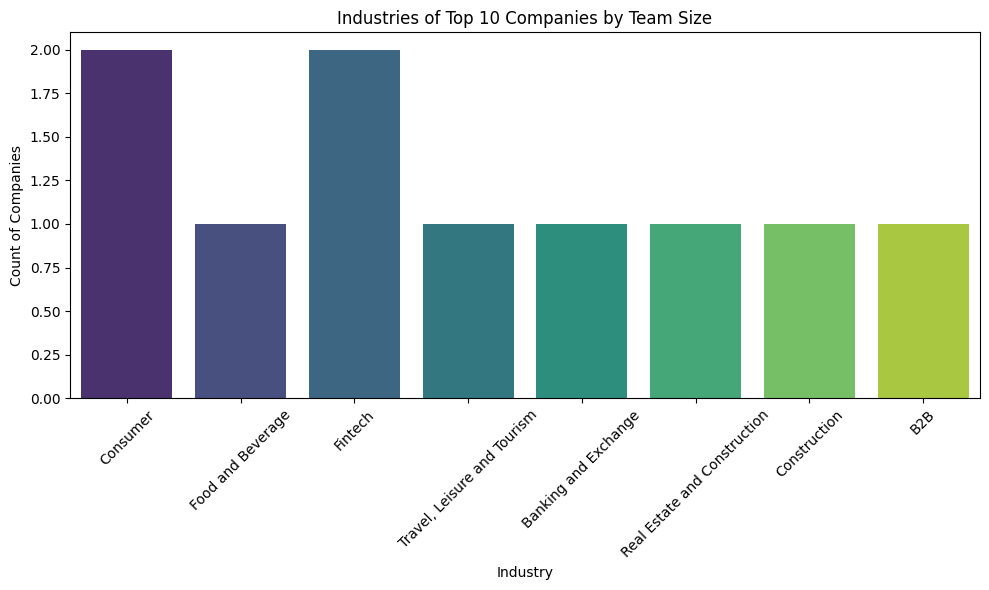

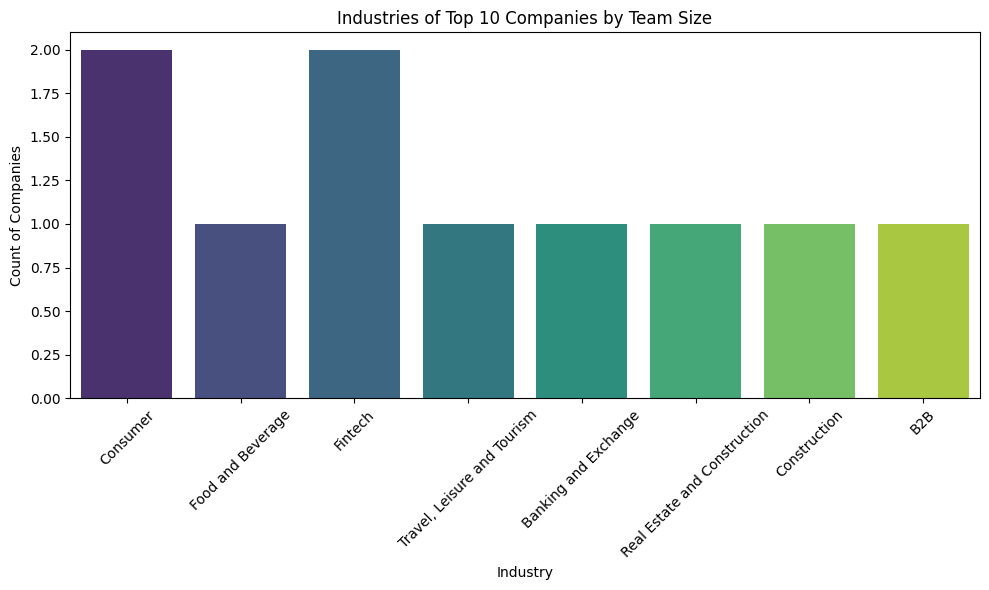

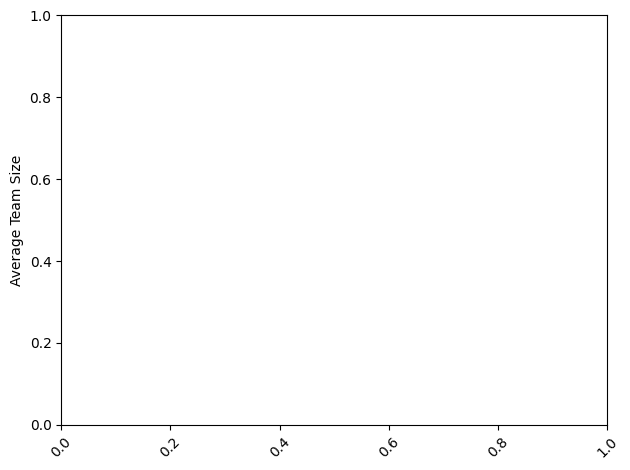

In [76]:
# Merge companies_df with industries_df to get the industry for each company
companies_industries_df = pd.merge(companies_df, industries_df, on='id')

# Calculate the average team size by industry
average_team_size_by_industry = companies_industries_df.groupby('industry')['teamSize'].mean().reset_index()

# Create a bar plot
plt.figure(figsize=(10, 6))# Set a threshold for team size
team_size_threshold = 2000  # Change this value to your desired threshold

# Merge companies_df with industries_df to get the industry for each company
companies_industries_df = pd.merge(companies_df, industries_df, on='id')

# Filter out companies with team sizes below the threshold
filtered_industries_df = companies_industries_df[companies_industries_df['teamSize'] >= team_size_threshold]

# Calculate the average team size by industry for the filtered data
average_team_size_by_industry = filtered_industries_df.groupby('industry')['teamSize'].mean().reset_index()

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=average_team_size_by_industry, x='industry', y='teamSize', palette='viridis')
plt.title('Average Team Size by Industry (Excluding Team Sizes Below Threshold)')
plt.xlabel('Industry')
plt.ylabel('Average Team Size')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

sns.barplot(data=average_team_size_by_industry, x='industry', y='teamSize', palette='viridis')
plt.title('Average Team Size by Industry')
plt.xlabel('Industry')# Merge companies_df with industries_df to get the industry for each company
companies_industries_df = pd.merge(companies_df, industries_df, on='id')

# Sort companies by team size and select the top 10
top_10_companies = companies_industries_df.nlargest(10, 'teamSize')

# Create a bar plot for the industries of the top 10 companies
plt.figure(figsize=(10, 6))
sns.countplot(data=top_10_companies, x='industry', palette='viridis')
plt.title('Industries of Top 10 Companies by Team Size')
plt.xlabel('Industry')
plt.ylabel('Count of Companies')
plt.xticks(rotation=45)
plt.tight_layout()# Merge companies_df with industries_df to get the industry for each company
companies_industries_df = pd.merge(companies_df, industries_df, on='id')

# Sort companies by team size and select the top 10
top_10_companies = companies_industries_df.nlargest(10, 'teamSize')

# Create a bar plot for the industries of the top 10 companies
plt.figure(figsize=(10, 6))
sns.countplot(data=top_10_companies, x='industry', palette='viridis')
plt.title('Industries of Top 10 Companies by Team Size')
plt.xlabel('Industry')
plt.ylabel('Count of Companies')
plt.xticks(rotation=45)
plt.tight_layout()# Merge companies_df with industries_df to get the industry for each company
companies_industries_df = pd.merge(companies_df, industries_df, on='id')

# Sort companies by team size and select the top 10
top_10_companies = companies_industries_df.nlargest(10, 'teamSize')

# Create a bar plot for the industries of the top 10 companies
plt.figure(figsize=(10, 6))
sns.countplot(data=top_10_companies, x='industry', palette='viridis')
plt.title('Industries of Top 10 Companies by Team Size')
plt.xlabel('Industry')
plt.ylabel('Count of Companies')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.show()

plt.show()

plt.ylabel('Average Team Size')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

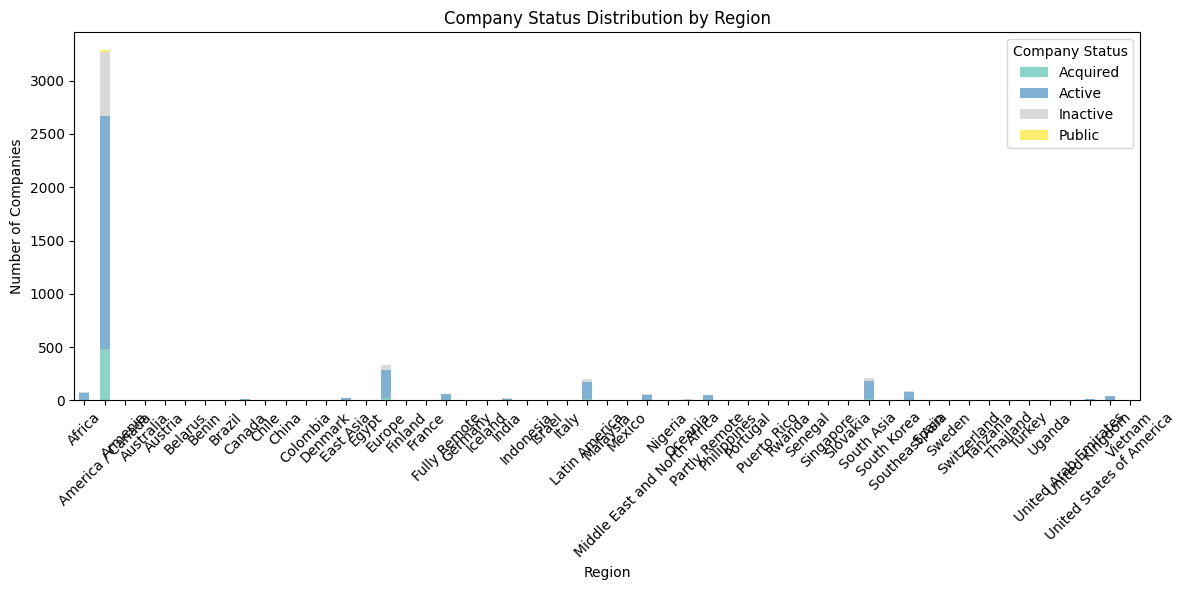

In [77]:
# Merge companies_df with regions_df to get the region for each company
companies_regions_df = pd.merge(companies_df, regions_df, on='id')

# Create a count of companies by region and status
status_counts_by_region = companies_regions_df.groupby(['region', 'status']).size().unstack(fill_value=0)

# Create a stacked bar plot
status_counts_by_region.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='Set3')
plt.title('Company Status Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Number of Companies')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(title='Company Status')
plt.show()


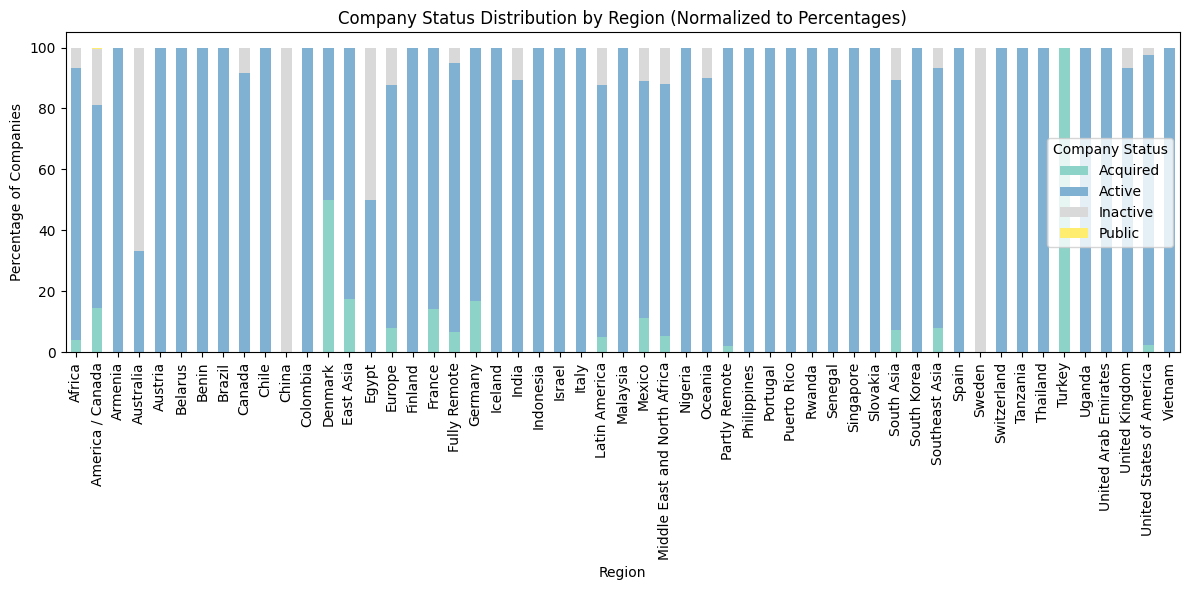

In [81]:
# Merge companies_df with regions_df to get the region for each company
companies_regions_df = pd.merge(companies_df, regions_df, on='id')

# Create a count of companies by region and status
status_counts_by_region = companies_regions_df.groupby(['region', 'status']).size().unstack(fill_value=0)

# Normalize the counts to get percentages
status_counts_percentage = status_counts_by_region.div(status_counts_by_region.sum(axis=1), axis=0) * 100

# Create a stacked bar plot for the percentages
status_counts_percentage.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='Set3')
plt.title('Company Status Distribution by Region (Normalized to Percentages)')
plt.xlabel('Region')
plt.ylabel('Percentage of Companies')
plt.xticks(rotation=90)
plt.tight_layout()
plt.legend(title='Company Status')
plt.show()
